In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("data/Real-Data/real_combine.csv")

In [3]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

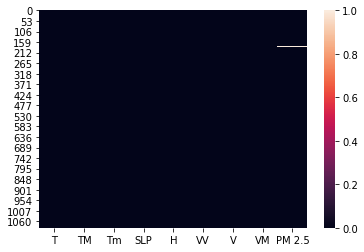

In [4]:
sns.heatmap(data.isnull())

In [5]:
data=data.dropna()

<AxesSubplot:>

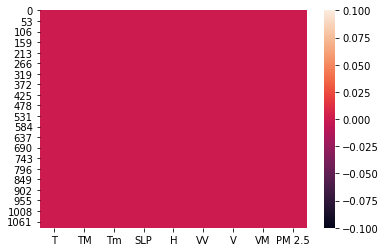

In [6]:
sns.heatmap(data.isnull())

In [7]:
X=data.iloc[:,0:8]
y=data.iloc[:,-1]

In [8]:
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [9]:
y.isnull().sum()

0

In [10]:
# train test split

In [14]:
len(X_train)

819

In [15]:
len(y_train)

819

## linear regression

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

In [17]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [18]:
coef=linreg.coef_

In [19]:
coef

array([-3.50190878e-01, -5.11480035e-01, -4.97926770e+00, -3.69531890e-03,
       -1.26318205e+00, -4.17052107e+01, -1.91759763e+00,  4.00059544e-01])

In [20]:
np.mean(coef)

-6.29132059598466

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X, y,cv=5,scoring="neg_mean_squared_error")

In [26]:
scores

array([-3578.63747158, -2495.13524377, -3335.35121512, -3704.64559628,
       -5317.23935995])

In [27]:
np.mean(scores)

-3686.2017773398848

## ridge regression

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
ridge=Ridge()
parameters={"alpha":[1e-15,1e-10,1e-9,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge=GridSearchCV(ridge,parameters,cv=5,scoring="neg_mean_squared_error")

In [30]:
ridge.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-09, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [31]:
print(ridge.best_params_)
print(ridge.best_score_)

{'alpha': 5}
-3028.423656791833


In [32]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [43]:
lasso=Lasso()
parameters={"alpha":[1e-15,1e-10,1e-9,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso=GridSearchCV(lasso,parameters,cv=5,scoring="neg_mean_squared_error")

In [44]:
lasso.fit(X_train,y_train)

f:\anaconda\envs\airquality\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1038388.1750058535, tolerance: 452.5898565409882
  positive)
f:\anaconda\envs\airquality\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876437.3525152833, tolerance: 423.6426055206109
  positive)
f:\anaconda\envs\airquality\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1001152.28738047, tolerance: 452.31151107266743
  positive)
f:\anaconda\envs\airquality\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-09, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [45]:
print(lasso.best_params_)
print(lasso.best_score_)

{'alpha': 1}
-3021.669592617175
